### TypeFormer Benchmark Analysis

#### Keycodes analysis - undefined keycodes used in the benchmark

In [1]:
import os
import pandas as pd

from collections import Counter

In [2]:
BENCH_PATH = "./prc_data/mobile_bench/"
bench_files = os.listdir(BENCH_PATH)

In [3]:
# per user percentage of 229 keycode
user_keycode_percentage = []

for bench_file in bench_files:
  usr_df = pd.read_csv(BENCH_PATH + bench_file)
  keycode_counter = Counter()
  for i, row in usr_df.iterrows():
    seq = eval(row["SEQUENCE"])
    for ev_tup in seq:
      keycode_counter[ev_tup[2]] += 1
  user_keycode_percentage.append(keycode_counter[229] / sum(keycode_counter.values()))


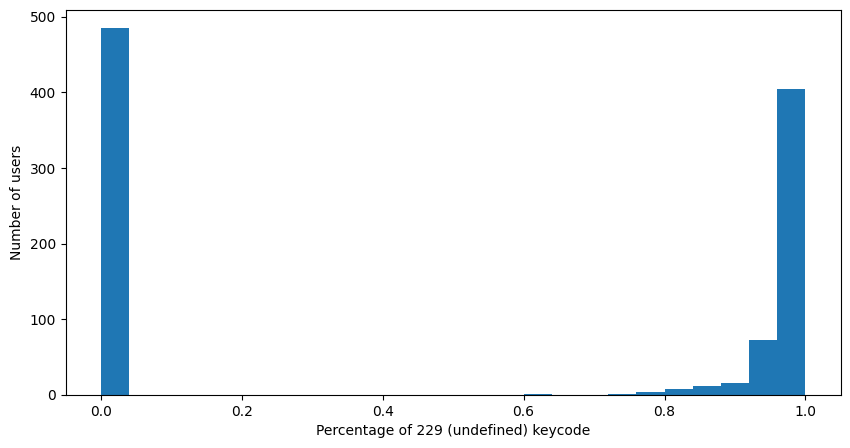

In [4]:
# plot the user_keycode_percentage descending order
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(user_keycode_percentage, bins=25)
plt.xlabel("Percentage of 229 (undefined) keycode")
plt.ylabel("Number of users")
# larger font
plt.rc('font', size=14)

plt.show()


In [5]:
# percentage of the users that have 229 keycode > 50%
print("Percentage of the users that have 229 keycode > 50%: ", sum([1 for p in user_keycode_percentage if p > 0.5]) / len(user_keycode_percentage))

Percentage of the users that have 229 keycode > 50%:  0.515


In [7]:
# percentage of the users that have 229 keycode > 50%
print("Percentage of the users that have 229 keycode > 80%: ", sum([1 for p in user_keycode_percentage if p >= 0.8]) / len(user_keycode_percentage))

Percentage of the users that have 229 keycode > 80%:  0.51


In [8]:
# average length of the sequence
avg_seq_len = []
for bench_file in bench_files:
  usr_df = pd.read_csv(BENCH_PATH + bench_file)
  usr_df["SQ_LEN"] = usr_df["SEQUENCE"].apply(lambda x: len(eval(x)) / 2)
  avg_seq_len.append(usr_df["SQ_LEN"].mean())
  

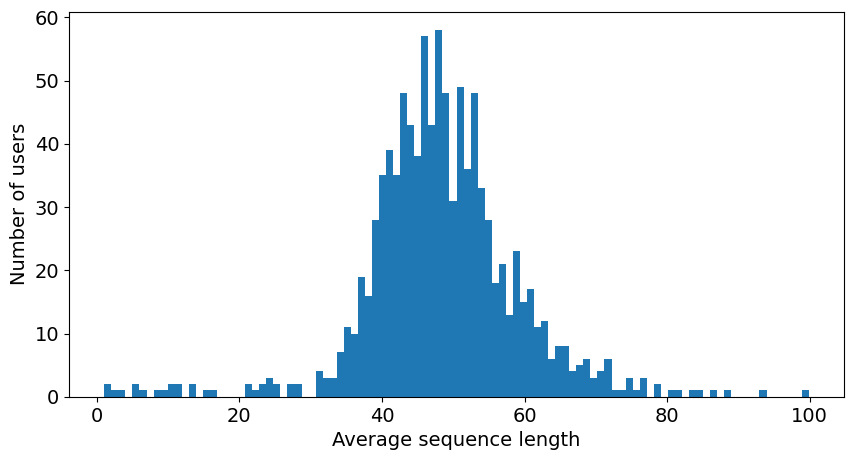

In [10]:
# plot the avg_seq_len descending order
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(avg_seq_len, bins=100)
plt.xlabel("Average sequence length")
plt.ylabel("Number of users")
# larger font
plt.rc('font', size=14)
